# Previsions de crédit de bancaire

## La Problematique

Lorsqu'une banque prête de l'argent à une personne, elle prend le risque que cette dernière ne rembourse pas cet argent dans le délai convenu. Ce risque est appelé Risque de Crédit. Alors avant d'octroyer un crédit, les banques vérifient si le client (ou la cliente) qui demande un prêt sera capable ou pas de le rembourser.  

Grâce à des modèles de Machine Learning, les banques peuvent modéliser la probabilité de défaut de paiement et ainsi attribuer un score à chaque nouveau demandeur de crédit : Credit Scoring

Dans cette Pratique, Nous allons apprendre à construire et évaluer un modèle de Machine Learning avec la (Regression Logistique) pour prédire si un demandeur de crédit sera en défaut de paiement ou non. Il s'agit d'un Problème de classification

In [1]:
#importation des packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, classification_report
import pickle

In [2]:
df_credit=pd.read_csv('train.csv')
df_credit

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df=df_credit.copy()
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# analyse exploratoire des données

In [4]:
#Examinons les types de nos données avec la Fct INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#Affichons les valeurs statistiques
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#verifions si il ya des valeurs manquantes
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Pour gerer les valeurs manquantes?:
Pour les variables catégoriques, on va les remplacer par le mode
Pour les variables numériques, on va les remplacer par la mediane

# Analyse univarié

In [8]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
#mettons en porcentage
df['Loan_Status'].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

<AxesSubplot:title={'center':' Crédit accordé ou pas'}>

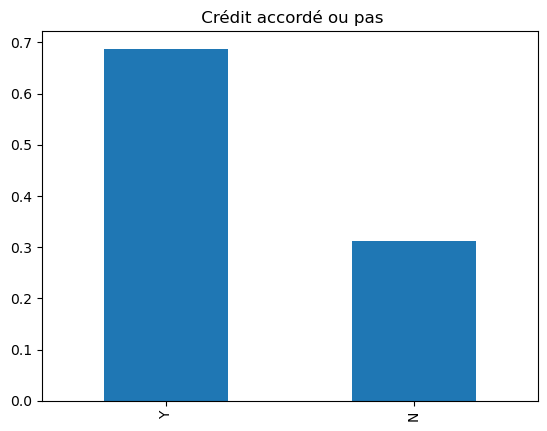

In [10]:
df['Loan_Status'].value_counts(normalize=True).plot.bar(title=' Crédit accordé ou pas')

### Analyse bivariée des variables categoriques

In [23]:
#les variables categoriques
var_cat=['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
#les variables numeriques
var_num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term',]
print('les variables catégoriques: ', var_cat)
print('les variables numériques: ', var_num)

les variables catégoriques:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
les variables numériques:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


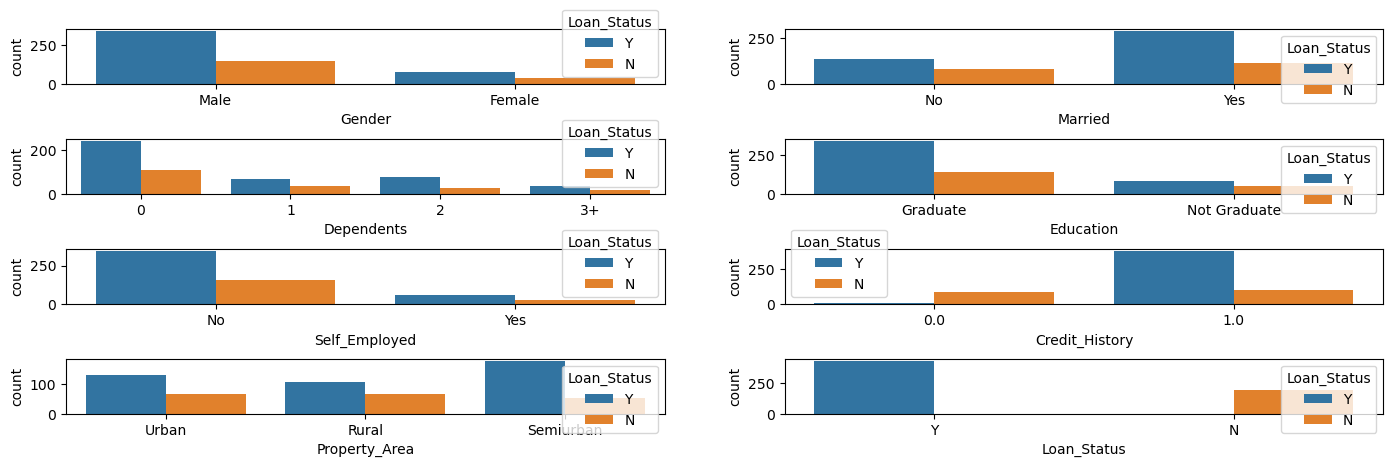

In [24]:
fig, axes=plt.subplots(4,2, figsize=(17,5))
for idx, cat_col in enumerate(var_cat):
    row, col =idx//2, idx%2
    sns.countplot(x=cat_col, data=df, hue='Loan_Status', ax=axes[row, col])
plt.subplots_adjust(hspace=1)

In [25]:
#df.corr()

Text(0.5, 1.0, 'Matrice de Corrélation')

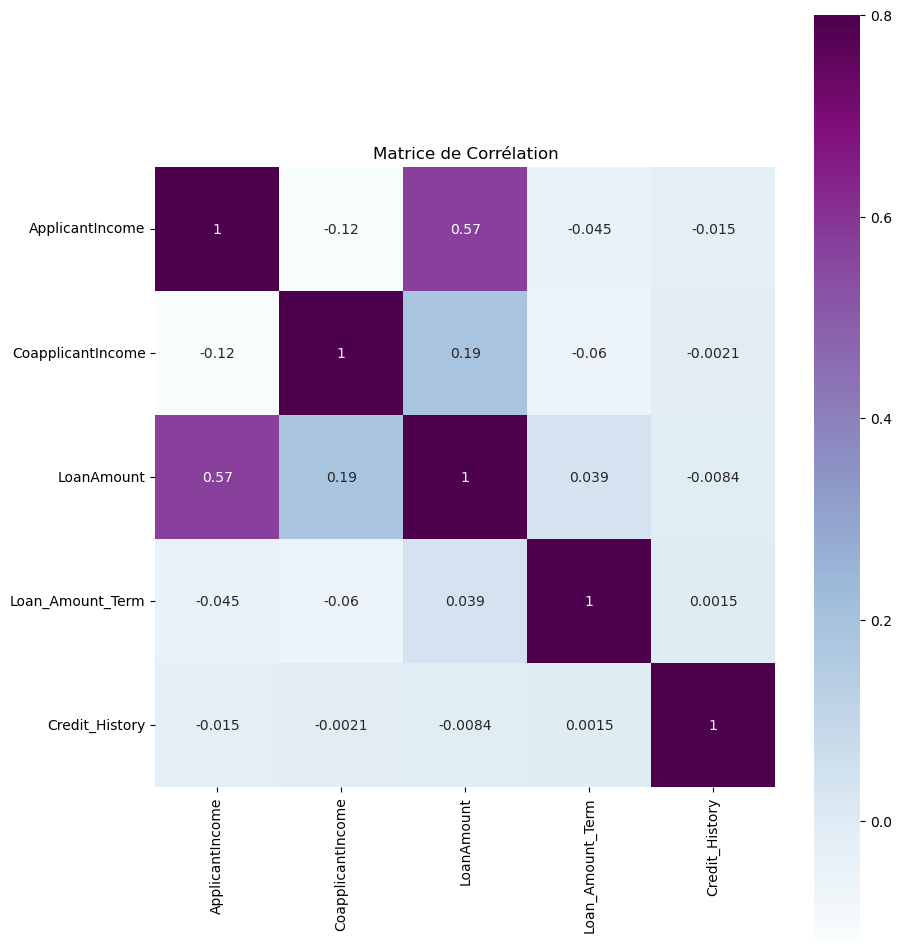

In [26]:
#Corrélation des variables numériques
matrix=df.corr()
f, ax=plt.subplots(figsize=(10,12))
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu', annot=True)
#plt.cm.RdYlBu_r
plt.title('Matrice de Corrélation')

# Preprocessing

In [27]:
#les variables categoriques
var_cat=['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
#les variables numeriques
var_num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term',]
print('les variables catégoriques: ', var_cat)
print('les variables numériques: ', var_num)

les variables catégoriques:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
les variables numériques:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [28]:
# por les variables categorigues, on les ramplace par leur mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [29]:
#df['Gender'].mode()

In [30]:
# pour les variables numeriques, on les ramplaces par leur mediane
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

In [31]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
#df.describe()

### La matrice de Corrélation(heatmap)

In [33]:
# for i, j in enumerate(var_cat):
#     print(i, j)

# La creation du modèle

In [34]:
df_cat=df[var_cat]
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,1.0,Urban,Y


### Mettons nos variables catégoriques en numérique

##### OneHot encoding With Dummy

In [35]:
# df_cat=pd.get_dummies(df_cat)
# df_cat

In [36]:
df_cat=pd.get_dummies(df_cat, drop_first=True)
df_cat

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1.0,1,0,0,0,0,0,0,0,1,1
1,1.0,1,1,1,0,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,1,0,1,1
3,1.0,1,1,0,0,0,1,0,0,1,1
4,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,1
610,1.0,1,1,0,0,1,0,0,0,0,1
611,1.0,1,1,1,0,0,0,0,0,1,1
612,1.0,1,1,0,1,0,0,0,0,1,1


In [37]:
df_num=df[var_num]
df_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,128.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


In [38]:
df_encoded=pd.concat([df_cat, df_num], axis=1)
df_encoded

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,1,0,0,0,0,0,0,0,1,1,5849,0.0,128.0,360.0
1,1.0,1,1,1,0,0,0,0,0,0,0,4583,1508.0,128.0,360.0
2,1.0,1,1,0,0,0,0,1,0,1,1,3000,0.0,66.0,360.0
3,1.0,1,1,0,0,0,1,0,0,1,1,2583,2358.0,120.0,360.0
4,1.0,1,0,0,0,0,0,0,0,1,1,6000,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,1,2900,0.0,71.0,360.0
610,1.0,1,1,0,0,1,0,0,0,0,1,4106,0.0,40.0,180.0
611,1.0,1,1,1,0,0,0,0,0,1,1,8072,240.0,253.0,360.0
612,1.0,1,1,0,1,0,0,0,0,1,1,7583,0.0,187.0,360.0


In [39]:
#je veux definir ma target Y
y=df_encoded['Loan_Status_Y']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: uint8

In [40]:
#je veux definir mes features x
X=df_encoded.drop('Loan_Status_Y', axis=1)
X

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,1,0,0,0,0,0,0,0,1,5849,0.0,128.0,360.0
1,1.0,1,1,1,0,0,0,0,0,0,4583,1508.0,128.0,360.0
2,1.0,1,1,0,0,0,0,1,0,1,3000,0.0,66.0,360.0
3,1.0,1,1,0,0,0,1,0,0,1,2583,2358.0,120.0,360.0
4,1.0,1,0,0,0,0,0,0,0,1,6000,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,2900,0.0,71.0,360.0
610,1.0,1,1,0,0,1,0,0,0,0,4106,0.0,40.0,180.0
611,1.0,1,1,1,0,0,0,0,0,1,8072,240.0,253.0,360.0
612,1.0,1,1,0,1,0,0,0,0,1,7583,0.0,187.0,360.0


In [41]:
# je vais specifier les données de train et de test
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)


In [42]:
#intenciation du modèle et entrainement du modele
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [43]:
# je veux faire une prediction 
pred=model.predict(x_test)
pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=uint8)

In [44]:
y_test

454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Loan_Status_Y, Length: 123, dtype: uint8

In [61]:
#verifions la performence de mon model
score=accuracy_score(y_test, pred, normalize=True)
score

0.8373983739837398

In [46]:
X.columns

Index(['Credit_History', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

In [47]:
#faire une prévision
profil_test=[[1,1,1,0,0,0,1,0,1,0,100,0,400,360]]
model.predict(profil_test)

C:\Users\FOUSSHO008\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=uint8)

In [48]:
#Enregistrer le modele dans pickle
pickle.dump(model, open('prevision_credit.pkl', 'wb'))

In [49]:
#plt.figure(figsize=(9, 6))
# x_train=np.arange(0,len(x_train),1)
# plt.scatter(x_train, y_train, color = 'red')
# plt.plot(x_train, pred, color = 'green')
# plt.xlabel('')
# plt.ylabel('')
# plt.title('')

# Les Metrics

### Confusion Matrix

Calculer la matrice de confusion pour évaluer l'exactitude d'une classification.

In [50]:
mat_conf = confusion_matrix(y_test, pred)
mat_conf

array([[15, 18],
       [ 2, 88]], dtype=int64)

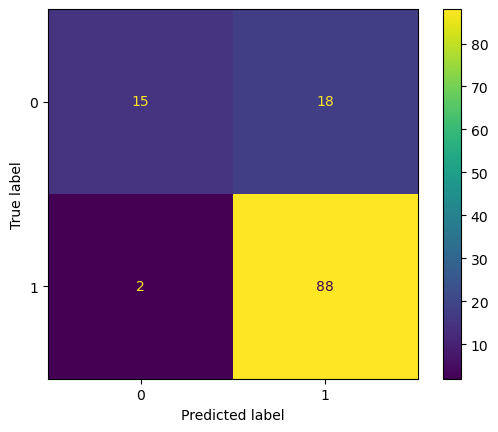

In [51]:
#ConfusionMatrixDisplay.from_estimator(model, x_test, y_test) , normalize='all'
ConfusionMatrixDisplay.from_predictions(y_test, pred) 
plt.show()

In [66]:
# fig, ax = plt.subplots(figsize=(10, 5))
# ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
# ax.xaxis.set_ticklabels()
# ax.yaxis.set_ticklabels()
# _ = ax.set_title(
#     f"Confusion Matrix for {clf.__class__.__name__}\non the original documents"
# )

#### Accuracy score

Dans la classification multiétiquette, cette fonction calcule la précision du sous-ensemble :
l'ensemble d'étiquettes prédit pour qu'un échantillon doit correspondre exactement à l'ensemble d'étiquettes correspondant dans y_true

In [62]:
score=accuracy_score(y_test, pred, normalize=True)
score

0.8373983739837398

#### F1 SCORE

In [65]:
f1Score=f1_score(y_test, pred, average='micro')
f1Score

0.8373983739837398

#### Precision (tp / (tp + fp)tpfp)

In [66]:
precision_score(y_test, pred, average='micro')

0.8373983739837398

In [68]:
classe_names = ['Accordé', 'Non Accordé']
print(classification_report(y_test, pred, target_names=classe_names))

              precision    recall  f1-score   support

     Accordé       0.88      0.45      0.60        33
 Non Accordé       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123

